# Pre-ProgramQuestion
1. H = W = (63 - 7 + 2 * 0) / 2 + 1 = 29. The output volume is 29 * 29 * 32

2. 300 * 300 * 3 * 100 + 1 = 27000001 parameters

3. convolved with filter 1:

| 9    | 8    | 2    |
| ---- | ---- | ---- |
| 4    | 16   | 9    |
| 16   | 22   | 3    |

convolved with filter 2:

| 20   | 8    | -6   |
| ---- | ---- | ---- |
| 7    | -1   | 19   |
| 24   | 7    | 0    |

4. 30 * 20 + 1 + (20 * 20 + 1) * 8 + 20 + 1 = 3830

5. CNN has smaller number of parameters to be learned. CNN utilzes the location information of the pixels in the images. 

# HW5_programQuestion

In [1]:
"""
Import libraries that you might require
"""

import numpy as np
import math
import matplotlib.pyplot as plt
import operator
import torch
import torchvision
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score
import sklearn.model_selection as ms
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


## 1. Loading the Dataset
The output of torchvision datasets are PILImage images of range [0, 1].  
We transform them to Tensors of normalized range [-1, 1].  
```Transforms.Normalize((mean,),(std,))``` basically manipulates the values of a pixel such that  
$$New\_Value = \frac{Old\_Value - Mean}{Std}$$



In [2]:
# Define a transform to normalize the data

#TODO : Set the value of mean and the standard deviation to 
#       normalize the image from range [0,1] to the range [-1, 1]


#Begin Your Code

mean = (0.5,)
std = (0.5,)

#End Your Code

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                                ])


#TODO : Select suitable value of batch_sizes.

#Begin Your Code

train_batch_size = 4
test_batch_size = 4
 
#End Your Code

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=train_batch_size, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size, shuffle=True)

# Classes
classes = {       0 :'T-shirt/top',
                  1 :'Trouser',
                  2 :'Pullover',
                  3 :'Dress',
                  4 :'Coat',
                  5 :'Sandal',
                  6 :'Shirt',
                  7 :'Sneaker',
                  8 :'Bag',
                  9 :'Ankle boot'}

## 2. The Dataset
Here we show some images of the dataset.  
See how many of the categories can you recognise.



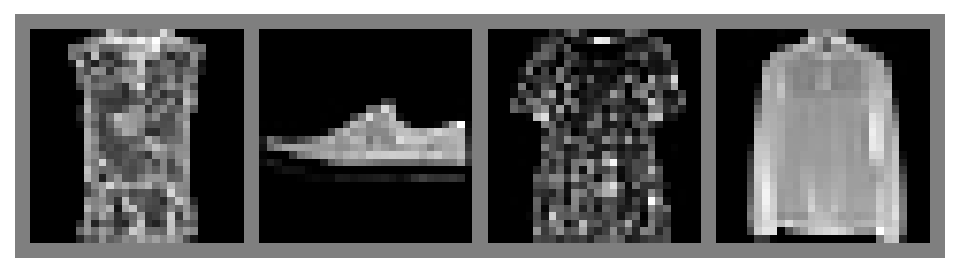

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

# Functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    
    figure(num=None, figsize=(8, 6), dpi=150, edgecolor='k')
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

## 3. Create your Convolutional Neural Network

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        #TODO : Design your network, you are allowed to explore your own architecture
        #       But you should achieve a better overall accuracy than the baseline network.
        #       Also, if you do design your own network, include an explanation 
        #       for your choice of network and how it may be better than the 
        #       baseline network.
        
        #Begin Your Code
        self.conv1 = nn.Conv2d(1, 16, 5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5, stride=1, padding=2)
        self.dropout = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(32 * 7 * 7, 520)
        self.fc2 = nn.Linear(520, 120)
        self.fc3 = nn.Linear(120, 10)
        #End Your Code

    def forward(self, x):

        #TODO : Implement the forward function that applies the layers you have created to the input

        #Begin Your Code
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = x.view(-1, 7 * 7 * 32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        #End Your Code


net = Net()

## 4. Define a Loss function and optimizer
We will be using [Cross Entropy Loss](https://pytorch.org/docs/stable/nn.html?highlight=crossentropyloss#torch.nn.CrossEntropyLoss) and [Adam optimizer](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam).  
Note: PyTorch's CrossEntropyLoss combines log softmax and negative log likelihood loss in one class. Make sure you are not computing softmax twice.



In [5]:
import torch.optim as optim

#TODO : Use appropriate loss criterion and optimizer 

#Begin Your Code

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

#End Your Code

## 5. Train the network

Here we are going to train the network while logging the per batch metrics.  
This would take some time to run (5-10 minutes).



In [6]:
overall_step = 0

#TODO : Select appropriate number of epochs

#Begin Your Code

epochs = 2

#End Your Code


for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        #TODO : Make predictions, calculate accuracy and update your weights once

        #Begin Your Code

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #End Your Code

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('Epoch: %d, Batch: %5d, loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0
            #Any thing that is added to the "info" gets plotted in tensorboard
            #TODO : Add the plots in Tensorboard to the report and explain what is happening
#             info = { ('loss') : loss.item(),('accuracy'): accuracy.item()}
#             for tag, value in info.items():
#                 logger.scalar_summary(tag, value, overall_step+1)

print('Finished Training')

Epoch: 1, Batch:   200, loss: 1.523
Epoch: 1, Batch:   400, loss: 0.893
Epoch: 1, Batch:   600, loss: 0.816
Epoch: 1, Batch:   800, loss: 0.759
Epoch: 1, Batch:  1000, loss: 0.754
Epoch: 1, Batch:  1200, loss: 0.669
Epoch: 1, Batch:  1400, loss: 0.716
Epoch: 1, Batch:  1600, loss: 0.682
Epoch: 1, Batch:  1800, loss: 0.627
Epoch: 1, Batch:  2000, loss: 0.634
Epoch: 1, Batch:  2200, loss: 0.630
Epoch: 1, Batch:  2400, loss: 0.561
Epoch: 1, Batch:  2600, loss: 0.558
Epoch: 1, Batch:  2800, loss: 0.569
Epoch: 1, Batch:  3000, loss: 0.524
Epoch: 1, Batch:  3200, loss: 0.546
Epoch: 1, Batch:  3400, loss: 0.513
Epoch: 1, Batch:  3600, loss: 0.532
Epoch: 1, Batch:  3800, loss: 0.509
Epoch: 1, Batch:  4000, loss: 0.502
Epoch: 1, Batch:  4200, loss: 0.547
Epoch: 1, Batch:  4400, loss: 0.527
Epoch: 1, Batch:  4600, loss: 0.474
Epoch: 1, Batch:  4800, loss: 0.532
Epoch: 1, Batch:  5000, loss: 0.512
Epoch: 1, Batch:  5200, loss: 0.469
Epoch: 1, Batch:  5400, loss: 0.546
Epoch: 1, Batch:  5600, loss

## 6. Test Accuracy
Let us look at how the network performs on the test dataset.  
Report your accuracy in your report.



In [7]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

#TODO : Report this accuracy in your report.

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 87 %


## 7. Per Class accuracy
Now we see the test accuracy for each class in the test dataset.  
Report these accuracies in your report. Also identify the problematic classes.  
Can you explain why these classes have significantly lower accuracies compared to other classes?


In [8]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 87 %
Accuracy of Trouser : 95 %
Accuracy of Pullover : 80 %
Accuracy of Dress : 92 %
Accuracy of  Coat : 77 %
Accuracy of Sandal : 96 %
Accuracy of Shirt : 53 %
Accuracy of Sneaker : 93 %
Accuracy of   Bag : 97 %
Accuracy of Ankle boot : 96 %


# Report of CNN

Since increasing layers may increase accuracy of neural network, three fully connected layers are applied here instead of one.
The accuracies of each type from top to bottom are 87%, 95%, 80%, 92%, 77%, 96%, 53%, 93%, 97%, 96%, respectively. The total accuracy of the task is 87%.

**Shirt** class and have significantly low accuracy because the shirts training set look very different from each other. The weights are not easy to be trained to converge. **Coat** and **pullover** have relatively low accuracy because these two classes are very similar to each other.
